In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [2]:
def calculate_distance(v, theta, t=1):
    # 3. 计算物体A和B在球面上的大圆弧距离（单位：千米）
    great_circle_distance_A = v * t  # 将距离转换为千米
    great_circle_distance_B = great_circle_distance_A

    # 4. 将夹角θ从角度制转换为弧度制
    theta_rad = math.radians(theta)

    # 5. 使用球面三角形的余弦定理计算物体A和B之间的距离S
    cos_S = math.cos(great_circle_distance_A / 6371)**2 + math.sin(great_circle_distance_A / 6371)**2 * math.cos(theta_rad)
    # print(cos_S)
    S_rad = math.acos(cos_S)

    # 6. 计算距离
    S = S_rad * 6371

    return S

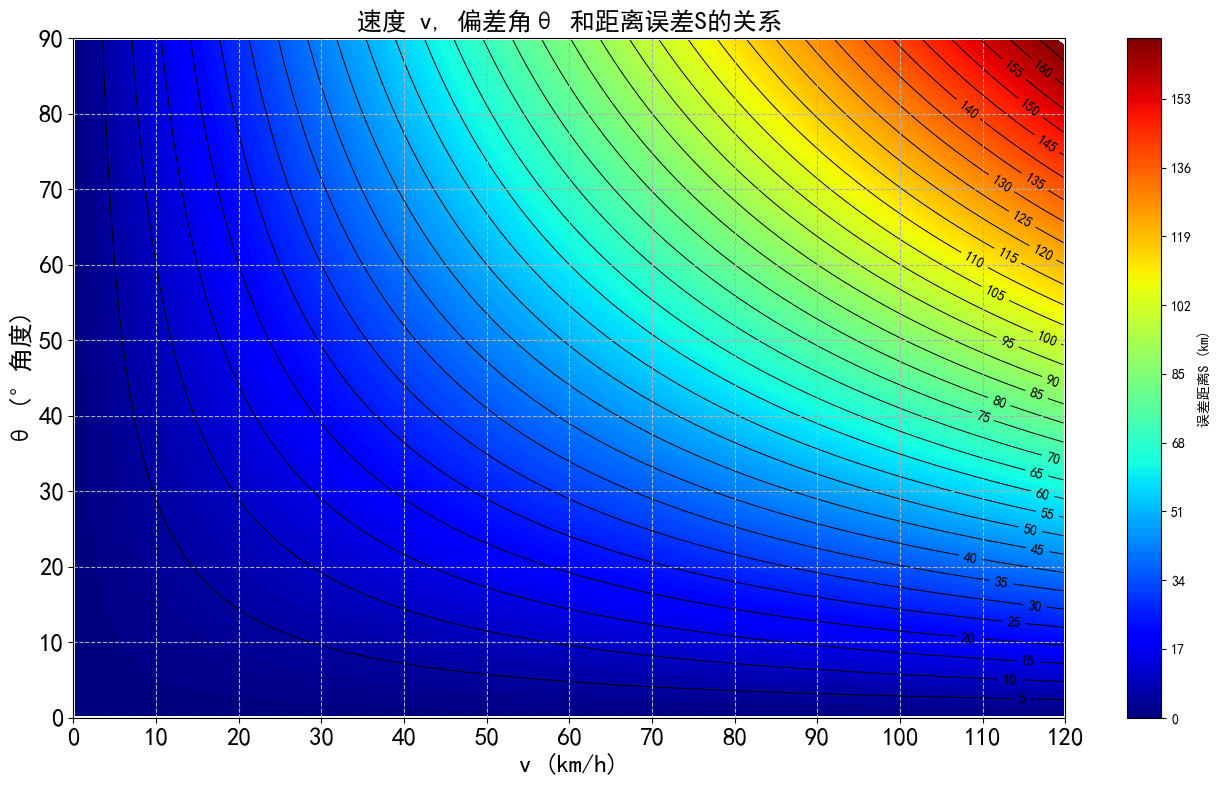

In [19]:
v_list = np.arange(0.25, 120, 0.25)
theta_list = np.arange(0.25, 90, 0.25)
[X,Y]=np.meshgrid(v_list,theta_list) 
vfunc = np.vectorize(calculate_distance)
distance = vfunc(X, Y)
fig = plt.figure(figsize=(16, 9), dpi=100)
levels_f = np.arange(0,distance.max(), 1)
levels_c = np.arange(0,distance.max(), 5)
cf = plt.contourf(X, Y, distance,levels_f, cmap='jet', zorder=0)
cb = fig.colorbar(cf, label='误差距离S (km)')
c = plt.contour(X, Y, distance,levels_c, zorder=1,colors='k',linewidths=0.7)
# 绘制等高线数据
plt.clabel(c, inline = True, fontsize = 10)
plt.xlabel('v (km/h)', fontdict = {'fontsize':18})
plt.ylabel('θ (°角度)',  fontdict = {'fontsize':18})
plt.tick_params(labelsize=18)  # here
plt.title('速度 v, 偏差角θ 和距离误差S的关系', size=18)
plt.grid(True, which='both', ls='dashed')
plt.xticks([0,10,20,30,40,50,60,70,80,90,100,110,120], )
plt.yticks([0,10,20,30,40,50,60,70,80,90], )
plt.show()

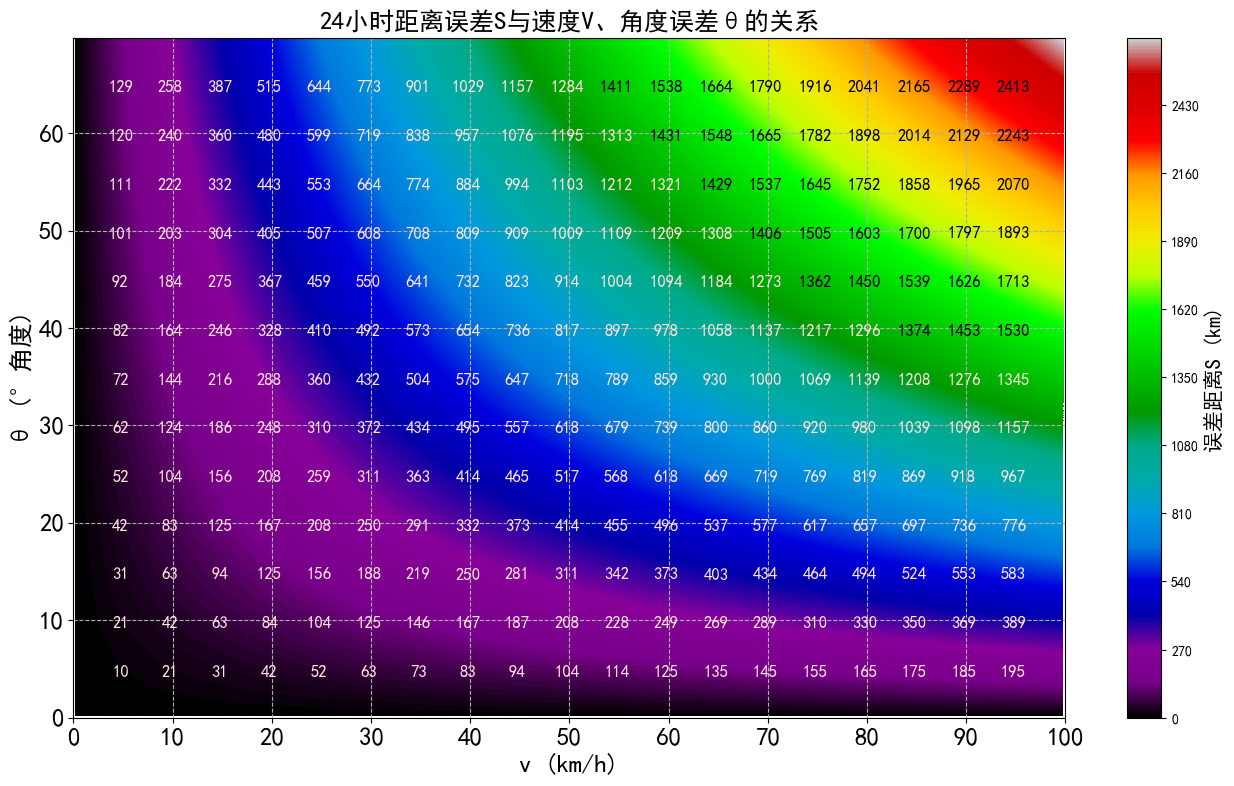

In [46]:
v_list = np.arange(0.25, 100, 0.25)
theta_list = np.arange(0.25, 70, 0.25)
[X,Y]=np.meshgrid(v_list,theta_list) 
vfunc = np.vectorize(calculate_distance)
target_t = 24 # 24小时
distance = vfunc(X, Y,24)
fig, ax = plt.subplots(figsize=(16, 9), dpi=100)
levels_f = np.arange(0,distance.max(), 1)
levels_c = np.arange(0,distance.max(), 5)
cf = plt.contourf(X, Y, distance,levels_f, cmap='nipy_spectral', zorder=0)
# cf = plt.imshow(distance, cmap='jet', zorder=0)
cb = fig.colorbar(cf, label='误差距离S (km)')
cb.set_label('误差距离S (km)',fontdict={'fontsize':15}) #设置colorbar的标签字体及其大小
# c = plt.contour(X, Y, distance,levels_c, zorder=1,colors='k',linewidths=0.7)
# 绘制等高线数据
plt.clabel(c, inline = True, fontsize = 10)
plt.xlabel('v (km/h)', fontdict = {'fontsize':18})
plt.ylabel('θ (°角度)',  fontdict = {'fontsize':18})
plt.tick_params(labelsize=18)  # here
plt.title(f'{target_t}小时距离误差S与速度V、角度误差θ的关系', size=18)
plt.grid(True, which='both', ls='dashed')
plt.xticks([0,10,20,30,40,50,60,70,80,90,100], )
plt.yticks([0,10,20,30,40,50,60], )
for i, theta in enumerate(theta_list):
    for j, v in enumerate(v_list):
        if(i%20==19 and j%20==19):
            if(distance[i, j]>distance.max()/2.0):
                iColor = 'black'
            else:
                iColor = 'mistyrose'
            ax.text(v_list[j]-0.25, theta_list[i]-0.25, f'{distance[i, j]:.0f}', ha='center', va='center', fontsize=12, color=iColor)
# ax.text(10, 10, 10, ha='center', va='center', fontsize=15, color='white')
plt.show()

In [55]:
v_list[19]%5 == 0

True

In [58]:
def draw(target_t = 24):

  v_list = np.arange(0.25, 100, 0.25)
  theta_list = np.arange(0.25, 70, 0.25)
  [X,Y]=np.meshgrid(v_list,theta_list) 
  vfunc = np.vectorize(calculate_distance)
   # 24小时
  distance = vfunc(X, Y,target_t)
  fig, ax = plt.subplots(figsize=(16, 9), dpi=100)
  levels_f = np.arange(0,distance.max(), 1)
  levels_c = np.arange(0,distance.max(), 5)
  cf = plt.contourf(X, Y, distance,levels_f, cmap='nipy_spectral', zorder=0)
  # cf = plt.imshow(distance, cmap='jet', zorder=0)
  cb = fig.colorbar(cf, label='误差距离S (km)')
  cb.set_label('误差距离S (km)',fontdict={'fontsize':15}) #设置colorbar的标签字体及其大小
  # c = plt.contour(X, Y, distance,levels_c, zorder=1,colors='k',linewidths=0.7)
  # 绘制等高线数据
  plt.clabel(c, inline = True, fontsize = 10)
  plt.xlabel('移速v (km/h)', fontdict = {'fontsize':18})
  plt.ylabel('θ (°角度)',  fontdict = {'fontsize':18})
  plt.tick_params(labelsize=18)  # here
  plt.title(f'{target_t}小时距离误差S与速度V、角度误差θ的关系', size=18)
  plt.grid(True, which='both', ls='dashed')
  plt.xticks([0,10,20,30,40,50,60,70,80,90,100], )
  plt.yticks([0,10,20,30,40,50,60], )
  for i, theta in enumerate(theta_list):
      for j, v in enumerate(v_list):
          if(v_list[j]%5 == 0 and theta_list[i]%5 == 0):
              if(distance[i, j]>1000):
                  iColor = 'black'
                  ax.text(v_list[j]-0.25, theta_list[i]-0.25, f'{distance[i, j]:.0f}', ha='center', va='center', fontsize=12, color=iColor)
              else:
                  iColor = 'mistyrose'
                  ax.text(v_list[j]-0.25, theta_list[i]-0.25, f'{distance[i, j]:.1f}', ha='center', va='center', fontsize=12, color=iColor)
  # ax.text(10, 10, 10, ha='center', va='center', fontsize=15, color='white')
  plt.show()
  plt.close()

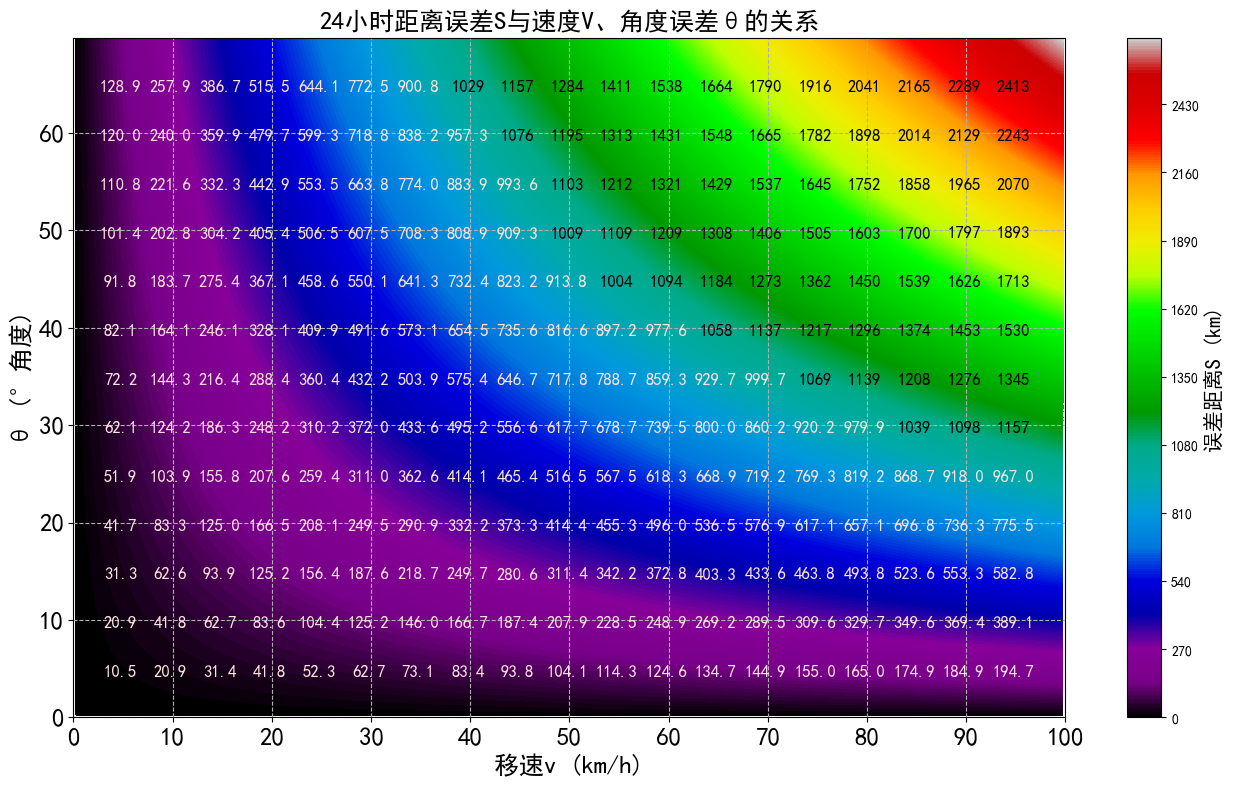

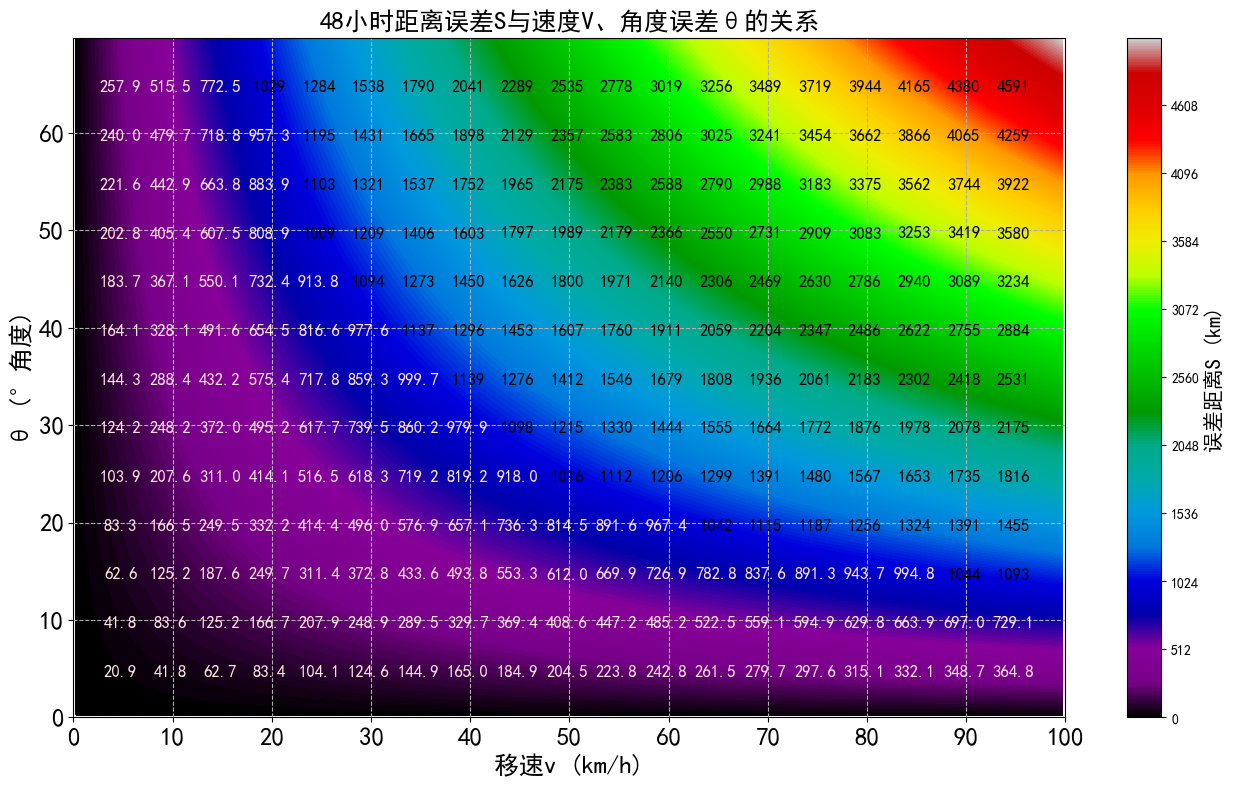

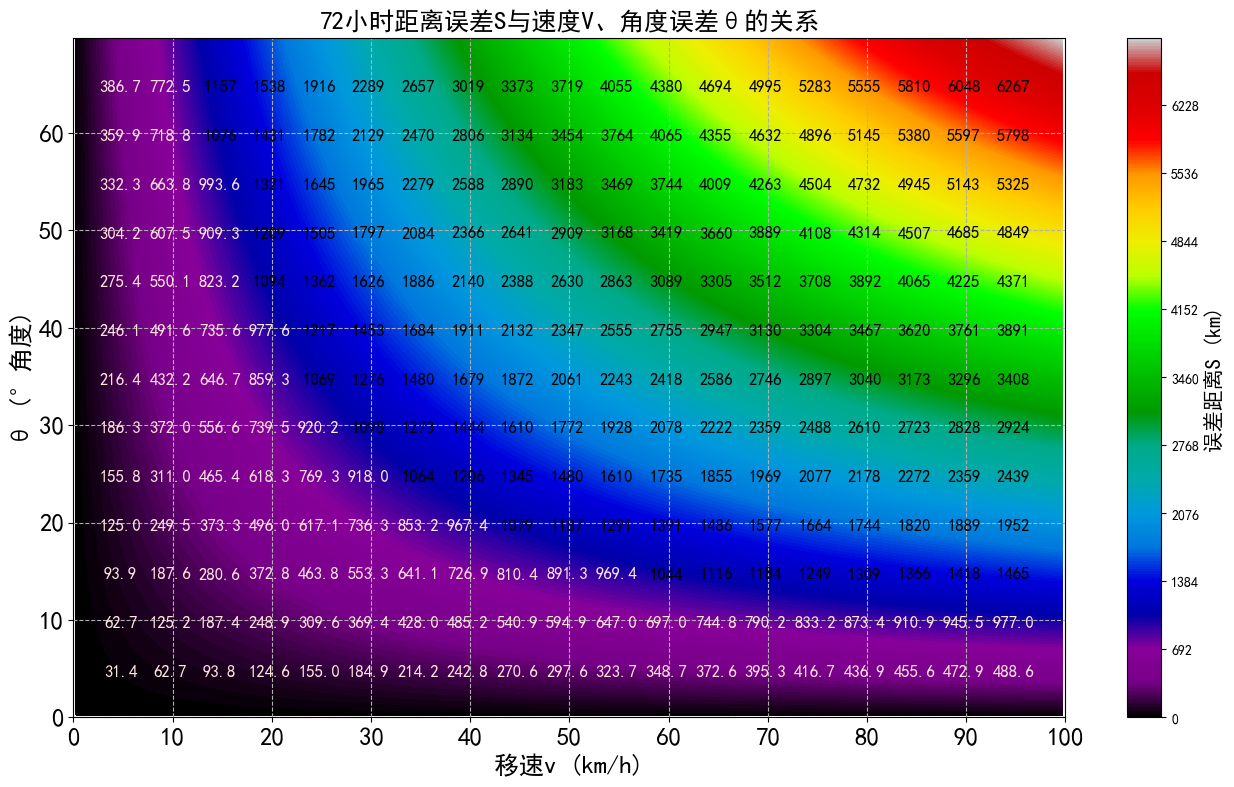

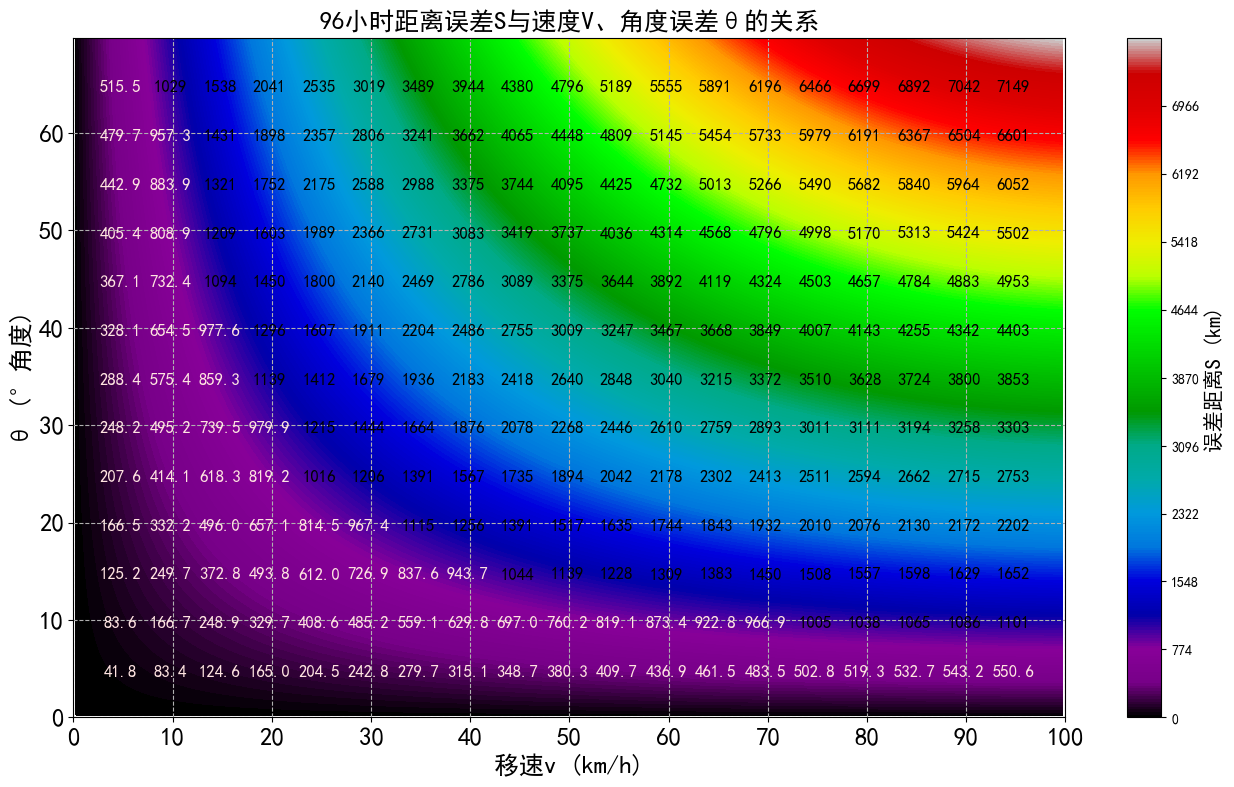

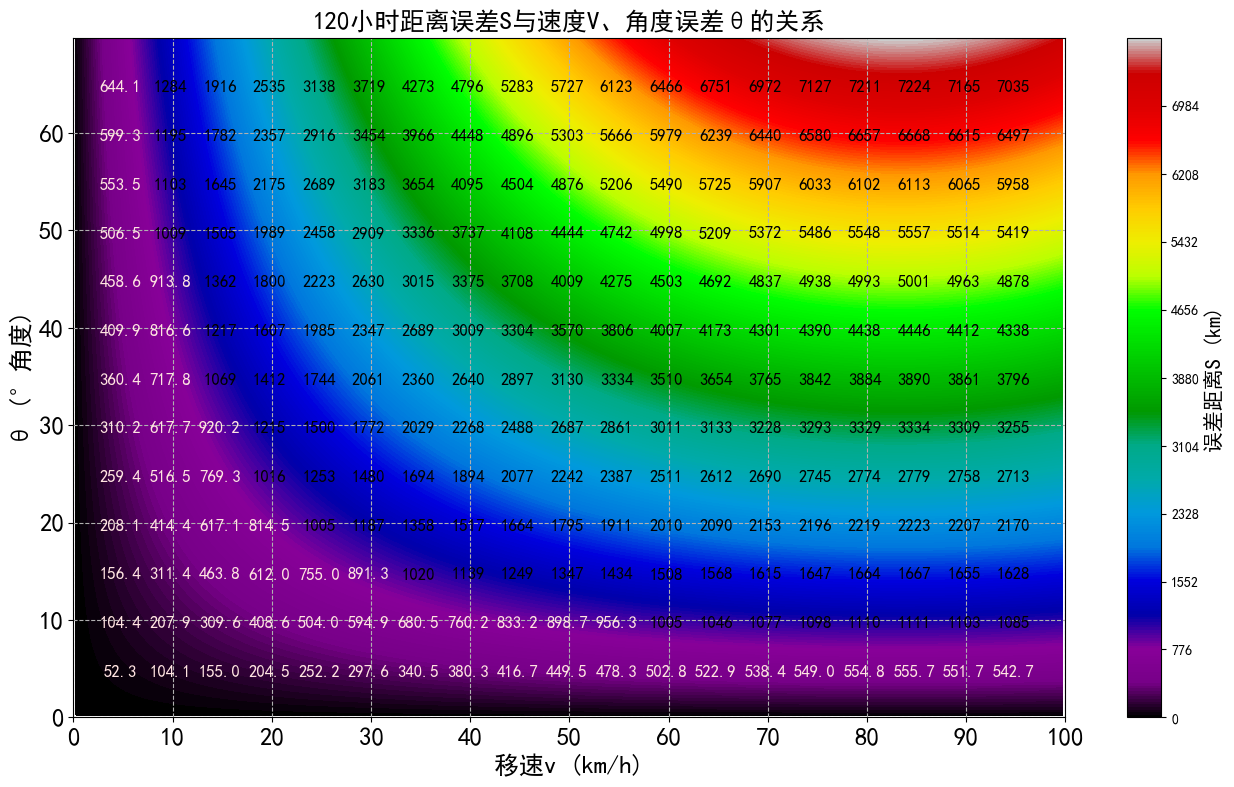

In [59]:
t_list = [24,48,72,96,120]
for iT in t_list:
  draw(target_t = iT)

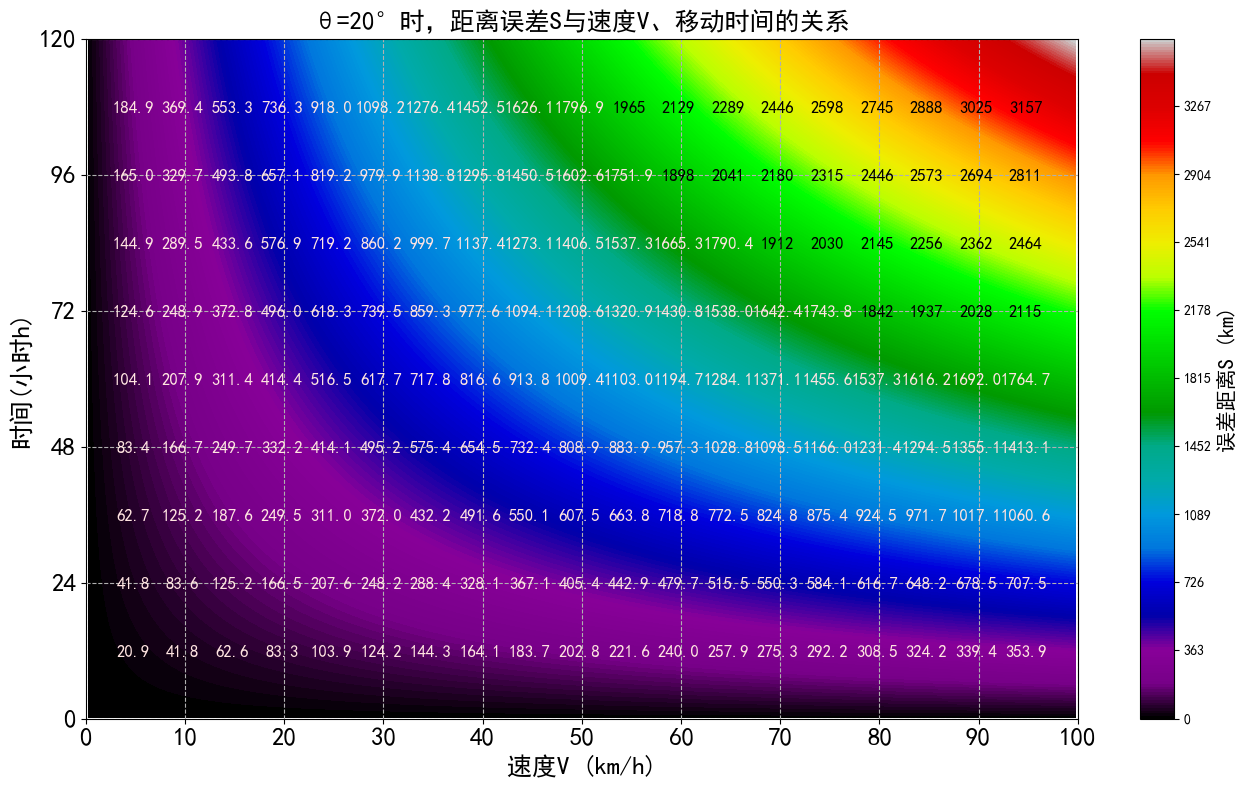

In [19]:
theta_list = np.arange(0.25, 70, 0.25)
v_list = np.arange(0.25, 100, 0.25)
t_list = np.arange(0.25, 120, 0.25)
[X,Y]=np.meshgrid(v_list,t_list) 
vfunc = np.vectorize(calculate_distance)
target_t = 24 # 24小时
target_theta = 20
distance = vfunc(target_theta, X, Y)
fig, ax = plt.subplots(figsize=(16, 9), dpi=100)
levels_f = np.arange(0,distance.max(), 1)
levels_c = np.arange(0,distance.max(), 5)
cf = plt.contourf(X, Y, distance,levels_f, cmap='nipy_spectral', zorder=0)
# cf = plt.imshow(distance, cmap='jet', zorder=0)
cb = fig.colorbar(cf, label='误差距离S (km)')
cb.set_label('误差距离S (km)',fontdict={'fontsize':15}) #设置colorbar的标签字体及其大小
# c = plt.contour(X, Y, distance,levels_c, zorder=1,colors='k',linewidths=0.7)
# 绘制等高线数据
plt.clabel(c, inline = True, fontsize = 10)
plt.xlabel('速度V (km/h)', fontdict = {'fontsize':18})
plt.ylabel('时间(小时h)',  fontdict = {'fontsize':18})
plt.tick_params(labelsize=18)  # here
plt.title(f'θ={target_theta}°时，距离误差S与速度V、移动时间的关系', size=18)
plt.grid(True, which='both', ls='dashed')
plt.xticks([0,10,20,30,40,50,60,70,80,90,100], )
plt.yticks([0,24,48,72,96,120], )
for i, theta in enumerate(t_list):
    for j, v in enumerate(v_list):
        if(i%48==47 and j%20==19):
            if(distance[i, j]>distance.max()/2.0):
                iColor = 'black'
                ax.text(v_list[j]-0.25, t_list[i]-0.25, f'{distance[i, j]:.0f}', ha='center', va='center', fontsize=12, color=iColor)
            else:
                iColor = 'mistyrose'
                ax.text(v_list[j]-0.25, t_list[i]-0.25, f'{distance[i, j]:.1f}', ha='center', va='center', fontsize=12, color=iColor)
# ax.text(10, 10, 10, ha='center', va='center', fontsize=15, color='white')
plt.show()

In [33]:

distance[:, target_index].shape

(479,)

In [34]:
t_list.shape

(479,)

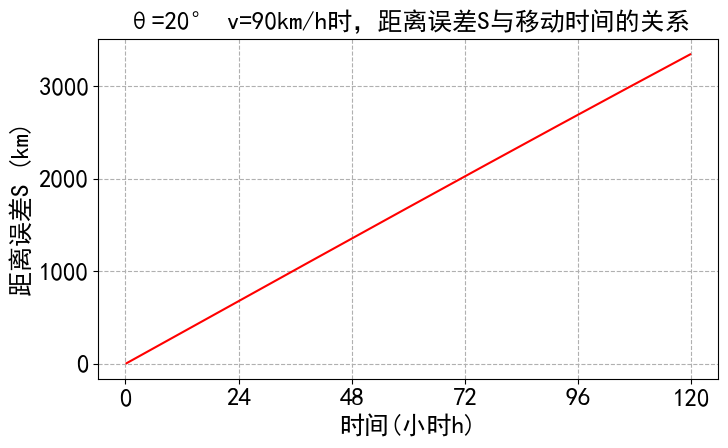

In [43]:
# 绘制曲线, X轴为t_list, Y轴为target_dis
target_speed = 90
target_index = target_speed*4-1
target_dis = distance[:, target_index]
plt.figure(figsize=(8, 4.5), dpi=100)
plt.plot(t_list, target_dis, 'r', label='距离误差S')
plt.xlabel('时间(小时h)', fontdict = {'fontsize':18})
plt.ylabel('距离误差S (km)',  fontdict = {'fontsize':18})
plt.tick_params(labelsize=18)  # here
plt.title(f'θ={target_theta}° v={target_speed}km/h时，距离误差S与移动时间的关系', size=18)
plt.grid(True, which='both', ls='dashed')
plt.xticks([0,24,48,72,96,120], )
# plt.yticks([0,10,20,30,40,50,60,70,80,90,100], )
plt.show()